In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pwd

'/Users/marcello/Python Notebooks'

In [4]:
#df = pd.read_csv('Downloads/20200505_cmsp_cmspi_name.csv')
df = pd.read_csv('data/20200505_cmsp_cmspi_name.csv')

In [5]:
df.shape

(1516659, 4)

In [6]:
df.head()

,eduspId,name,nick,createdAt
0,00001144500618sp,DAVI DOUGLAS JERONIMO DE ANDRADE,_00001144500618-sp,2020-05-05T10:26:22.000Z
1,1082564266sp,evelyn karolaine,_0001082564266sp-sp,2020-04-30T13:24:24.000Z
2,00001077715560sp,Yago Matheus Souza Paes,_02072004-sp,2020-04-28T18:39:50.000Z
3,000109682713xsp,JULIA BEATRIZ MORELLI DOS SANTOS,_04juuuh-sp,2020-04-29T21:55:08.000Z
4,0001089986518sp,julia mota de Almeida,_089986518-sp,2020-05-05T10:17:17.000Z


In [7]:
#df = df[df['eduspId'].str.contains("rg")]

In [8]:
df.shape

(1516659, 4)

In [9]:
#pd.set_option('display.max_rows', 3000)
#print(df)

In [10]:
a = df['eduspId'].str.lstrip('0')

In [11]:
a = a.str.upper()

In [12]:
df_ajustado = df.assign(login=a)

In [13]:
df_ajustado.head()

,eduspId,name,nick,createdAt,login
0,00001144500618sp,DAVI DOUGLAS JERONIMO DE ANDRADE,_00001144500618-sp,2020-05-05T10:26:22.000Z,1144500618SP
1,1082564266sp,evelyn karolaine,_0001082564266sp-sp,2020-04-30T13:24:24.000Z,1082564266SP
2,00001077715560sp,Yago Matheus Souza Paes,_02072004-sp,2020-04-28T18:39:50.000Z,1077715560SP
3,000109682713xsp,JULIA BEATRIZ MORELLI DOS SANTOS,_04juuuh-sp,2020-04-29T21:55:08.000Z,109682713XSP
4,0001089986518sp,julia mota de Almeida,_089986518-sp,2020-05-05T10:17:17.000Z,1089986518SP


In [14]:
df_ajustado.shape

(1516659, 5)

In [24]:
columns = ['login', 'name']
df_ajustado = df_ajustado[columns].drop_duplicates()
df_ajustado.head()
df_ajustado.shape

(1465782, 2)

In [25]:
alunos = pd.read_csv('data/alunos.csv', sep=';')

In [26]:
alunos.head()

,nm_login,cd_escola,nm_completo_escola,nm_diretoria,cd_tipo_ensino_equivalente,nr_serie_equivalente,cd_aluno
0,00001095141120SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,26985331
1,00001114747798SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,28945996
2,00001074567456SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,24927968
3,00001075378400SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,25009063
4,0000107865122XSP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,25336343


In [27]:
alunos.shape

(3328155, 7)

In [28]:
b = alunos['nm_login'].str.lstrip('0')

In [29]:
alunos_ajustado = alunos.assign(login=b)

In [30]:
alunos_ajustado.head()

,nm_login,cd_escola,nm_completo_escola,nm_diretoria,cd_tipo_ensino_equivalente,nr_serie_equivalente,cd_aluno,login
0,00001095141120SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,26985331,1095141120SP
1,00001114747798SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,28945996,1114747798SP
2,00001074567456SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,24927968,1074567456SP
3,00001075378400SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,25009063,1075378400SP
4,0000107865122XSP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,25336343,107865122XSP


In [31]:
alunos_ajustado[alunos_ajustado['login'] == '1144500618SP']

,nm_login,cd_escola,nm_completo_escola,nm_diretoria,cd_tipo_ensino_equivalente,nr_serie_equivalente,cd_aluno,login
2513628,00001144500618SP,4509,MARIA ODILA GUIMARAES BUENO PROFESSORA,CENTRO SUL,14,1,31916233,1144500618SP


In [32]:
alunos_join = alunos_ajustado.merge(df_ajustado, how='left', left_on='login', right_on='login')

In [33]:
alunos_join.head()

,nm_login,cd_escola,nm_completo_escola,nm_diretoria,cd_tipo_ensino_equivalente,nr_serie_equivalente,cd_aluno,login,name
0,00001095141120SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,26985331,1095141120SP,YASMIN VIEIRA LACERDA
1,00001114747798SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,28945996,1114747798SP,NaN
2,00001074567456SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,24927968,1074567456SP,NaN
3,00001075378400SP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,25009063,1075378400SP,NaN
4,0000107865122XSP,32165,JOSE SANCHES POSTIGO DEPUTADO,SANTO ANASTACIO,14,7,25336343,107865122XSP,NaN


In [34]:
alunos_join.shape

(3334116, 9)

In [35]:
alunos_join['name'].notna().sum()   # or s.isnull().sum() for older pandas versions

1458890

# Criar dataframe de escolas

In [36]:
escolas = alunos.groupby('cd_escola').size().to_frame(name='qtd')

In [37]:
escolas.head()

,qtd
cd_escola,
12,559
24,2088
36,2009
48,977
59,1000


# Criar dataframe escolas CMSP

In [39]:
escolas_cmsp = alunos_join.dropna(subset=['name'])

In [40]:
escolas_cmsp = escolas_cmsp.groupby('cd_escola').size().to_frame(name='qtd')

In [41]:
escolas_cmsp.head()

,qtd
cd_escola,
12,522
24,616
36,1143
48,281
59,425


# Join nos dataframes

In [42]:
escolas_join = escolas.merge(escolas_cmsp, how='left', on='cd_escola')

In [43]:
escolas_join.head()

,qtd_x,qtd_y
cd_escola,,
12,559,522.0
24,2088,616.0
36,2009,1143.0
48,977,281.0
59,1000,425.0


In [44]:
escolas_join = escolas_join.assign(pct = escolas_join['qtd_y'] / escolas_join['qtd_x'])

In [72]:
escolas_join = escolas_join.reset_index()

In [74]:
escolas_join.head()

,cd_escola,qtd_x,qtd_y,pct
0,12,559,522.0,0.933810
1,24,2088,616.0,0.295019
2,36,2009,1143.0,0.568940
3,48,977,281.0,0.287615
4,59,1000,425.0,0.425000


# gerar para Diogo

In [77]:
ipvs_escola = pd.read_csv('data/ipvs_escola.csv')
ipvs_escola.head()

escolas_diogo = escolas_join.merge(ipvs_escola, how='left', left_on='cd_escola', right_on='cie')

escolas_diogo.rename(columns={'qtd_x':'total_alunos',
                          'qtd_y':'alunos_cmsp',
                          'pct':'pct_aluno',
                          'ipvs_2010':'ipvs'}, 
                 inplace=True)

escolas_diogo[['cd_escola', 'total_alunos', 'alunos_cmsp', 'ipvs', 'pct_aluno']].head()

escolas_diogo.to_csv('data/escolas_CMSP.csv', index=False)

In [47]:
escolas_join.loc[escolas_join['pct'] > 1, 'pct'] = 1

# Escolas com maior pct (mais de 100 alunos)

In [48]:
escolas_join[escolas_join['qtd_x'] > 100].sort_values(by='pct', ascending=False).head(10)

,qtd_x,qtd_y,pct
cd_escola,,,
21696,334,328.0,0.982036
496376,397,388.0,0.977330
19720,476,461.0,0.968487
14965,255,244.0,0.956863
35361,257,245.0,0.953307
17231,545,519.0,0.952294
923874,395,374.0,0.946835
21763,221,209.0,0.945701
24077,467,441.0,0.944325


# Escolas com menor pct (mais de 100 alunos)

In [85]:
escolas_join[escolas_join['qtd_x'] > 100].sort_values(by='pct', ascending=True).head(10)

,qtd_x,qtd_y,pct
cd_escola,,,
925135,292,2.0,0.006849
36559,177,2.0,0.011299
1223,425,7.0,0.016471
909762,157,4.0,0.025478
36250,150,4.0,0.026667
20382,349,10.0,0.028653
904399,387,12.0,0.031008
921701,185,7.0,0.037838
42134,538,21.0,0.039033


# Plotar qtd de escolas por faixa

In [86]:
def fn_faixa(valor):
    if valor <= 0.25:
        faixa = '0% - 25%'
    elif valor <= 0.5:
        faixa = '25% - 50%'
    elif valor <= 0.75:
        faixa = '50% - 75%'
    else:
        faixa = '75% - 100%'
    return faixa

In [87]:
#escolas_join = escolas_join.assign(faixa = fn_faixa(escolas_join['pct'])
escolas_join = (escolas_join.assign(faixa= lambda x: pd.cut(x['pct'], 
                                              bins=[0, 0.25, 0.5, 0.75, 1],
                                              labels=['0% - 25%', '25% - 50%', '50% - 75%', '75% - 100%'])))

In [88]:
escolas_join.head()

,qtd_x,qtd_y,pct,faixa
cd_escola,,,,
12,559,544.0,0.973166,75% - 100%
24,2088,636.0,0.304598,25% - 50%
36,2009,1185.0,0.589846,50% - 75%
48,977,286.0,0.292733,25% - 50%
59,1000,432.0,0.432000,25% - 50%


In [125]:
df_plot = escolas_join.groupby('faixa').count()

In [130]:
df_plot.head()

,qtd_x,qtd_y,pct
faixa,,,
0% - 25%,739,739,739
25% - 50%,2153,2153,2153
50% - 75%,1712,1712,1712
75% - 100%,470,470,470


In [126]:
x = df_plot.index
y = df_plot['pct']

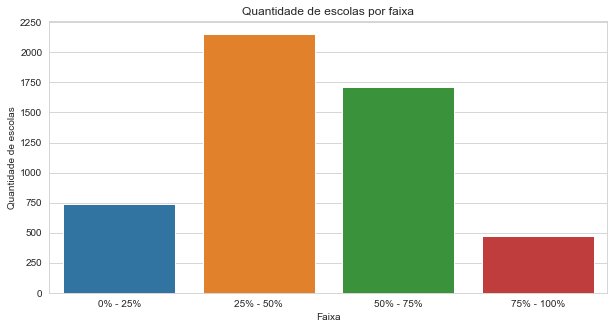

In [127]:
%matplotlib inline

plt.figure(figsize=(10,5))
bar = sns.barplot(x=x, y=y)
sns.set_style("whitegrid")
plt.ylabel('Quantidade de escolas')
plt.xlabel('Faixa')
plt.yticks(np.arange(0, 2500, step=250))
plt.title('Quantidade de escolas por faixa')
plt.show()

# Dataframe de séries

In [133]:
series = alunos.groupby(['cd_tipo_ensino_equivalente','nr_serie_equivalente']).size().to_frame(name='qtd')

In [134]:
series

qtd
cd_tipo_ensino_equivalente nr_serie_equivalente        
2                          0                       9315
                           1                     493936
                           2                     437744
                           3                     363446
14                         0                      16940
                           1                     112412
                           2                     125423
                           3                     133499
                           4                     125539
                           5                     126955
                           6                     347433
                           7                     338802
                           8                     346230
                           9                     350481

# Dataframe de séries CMSP

In [135]:
series_cmsp = alunos_join.dropna(subset=['nick'])

In [138]:
series_cmsp = series_cmsp.groupby(['cd_tipo_ensino_equivalente','nr_serie_equivalente']).size().to_frame(name='qtd')

In [139]:
series_cmsp

qtd
cd_tipo_ensino_equivalente nr_serie_equivalente        
2                          1                     243438
                           2                     238700
                           3                     200782
14                         0                        251
                           1                      23650
                           2                      27390
                           3                      29850
                           4                      29157
                           5                      31096
                           6                     151868
                           7                     162807
                           8                     177639
                           9                     192961

# Join dataframes

In [141]:
series_join = series.merge(series_cmsp, how='left', on=['cd_tipo_ensino_equivalente','nr_serie_equivalente'])

In [142]:
series_join

qtd_x     qtd_y
cd_tipo_ensino_equivalente nr_serie_equivalente                  
2                          0                       9315       NaN
                           1                     493936  243438.0
                           2                     437744  238700.0
                           3                     363446  200782.0
14                         0                      16940     251.0
                           1                     112412   23650.0
                           2                     125423   27390.0
                           3                     133499   29850.0
                           4                     125539   29157.0
                           5                     126955   31096.0
                           6                     347433  151868.0
                           7                     338802  162807.0
                           8                     346230  177639.0
                           9                     350481  192961.0

In [143]:
series_join = series_join.assign(pct = series_join['qtd_y'] / series_join['qtd_x'])

In [144]:
series_join

qtd_x     qtd_y       pct
cd_tipo_ensino_equivalente nr_serie_equivalente                            
2                          0                       9315       NaN       NaN
                           1                     493936  243438.0  0.492853
                           2                     437744  238700.0  0.545296
                           3                     363446  200782.0  0.552440
14                         0                      16940     251.0  0.014817
                           1                     112412   23650.0  0.210387
                           2                     125423   27390.0  0.218381
                           3                     133499   29850.0  0.223597
                           4                     125539   29157.0  0.232255
                           5                     126955   31096.0  0.244937
                           6                     347433  151868.0  0.437114
                           7                     338802  162807.0  0.480537
                           8                     346230  177639.0  0.513066
                           9                     350481  192961.0  0.550561

In [178]:
y = series_join.index.tolist()
x = series_join['pct'].tolist()

In [179]:
y = ['EM - Multisseriada',
    'EM - 1ª Série',
    'EM - 2ª Série',
    'EM - 3ª Série',
    'EF - Multisseriada',
    'EF - 1º Ano',
    'EF - 2º Ano',
    'EF - 3º Ano',
    'EF - 4º Ano',
    'EF - 5º Ano',
    'EF - 6º Ano',
    'EF - 7º Ano',
    'EF - 8º Ano',
    'EF - 9º Ano']

In [187]:
order =     ['EF - Multisseriada',
    'EF - 1º Ano',
    'EF - 2º Ano',
    'EF - 3º Ano',
    'EF - 4º Ano',
    'EF - 5º Ano',
    'EF - 6º Ano',
    'EF - 7º Ano',
    'EF - 8º Ano',
    'EF - 9º Ano',
    'EM - Multisseriada',
    'EM - 1ª Série',
    'EM - 2ª Série',
    'EM - 3ª Série']

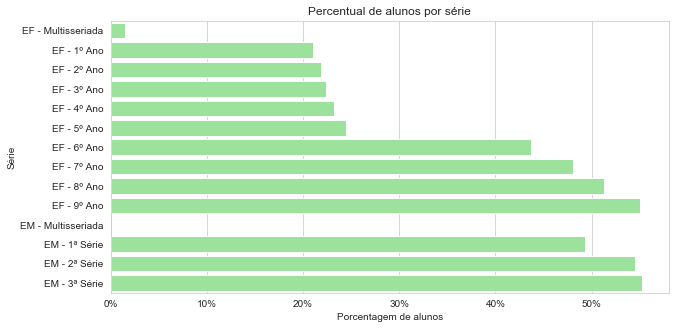

In [195]:
%matplotlib inline

plt.figure(figsize=(10,5))
bar = sns.barplot(x=x, y=y, color='lightgreen', order=order)
sns.set_style("whitegrid")
plt.ylabel('Série')
plt.xlabel('Porcentagem de alunos')
plt.xticks(np.arange(0, 0.6, step=0.1))
bar.set_xticklabels(['0%','10%','20%','30%','40%','50%'])
plt.title('Percentual de alunos por série')
plt.show()